In [14]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [15]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("C:\\Users\\bhanu\\OneDrive\\Desktop\\flipkartgrid\\interactions_information.csv")
df.columns = ['user_id', 'product_id', 'categorie', 'sub_categorie','rating']
df_copy = df.copy(deep=True)

In [16]:
# Display basic information about the DataFrame
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  98561
No of columns =  5


In [17]:
# Check for missing values in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98561 entries, 0 to 98560
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        98561 non-null  object
 1   product_id     98561 non-null  int64 
 2   categorie      98561 non-null  object
 3   sub_categorie  98561 non-null  object
 4   rating         98561 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [18]:
# Display descriptive statistics for the 'rating' column
df['rating'].describe()

count    98561.000000
mean         3.499569
std          1.116746
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

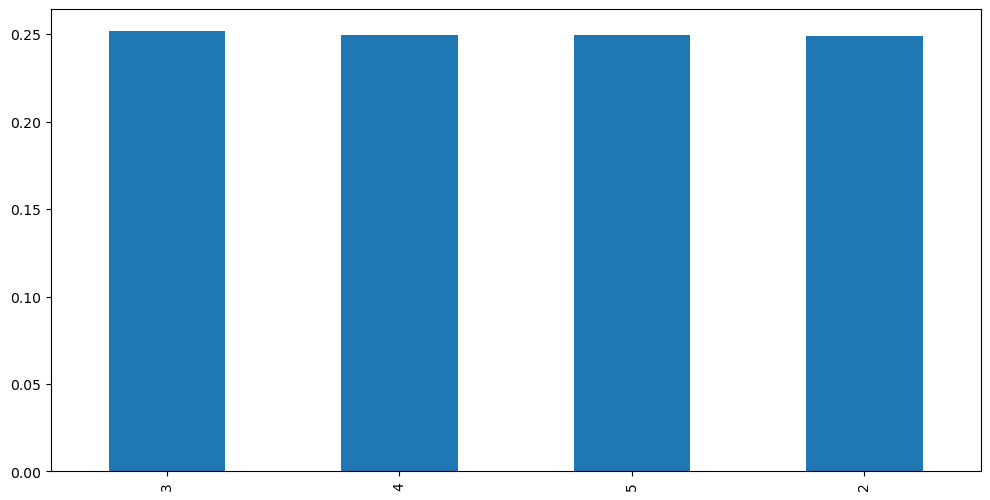

In [19]:
# Create a bar plot to visualize the distribution of ratings
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()


In [20]:
# Display the number of unique users and unique products in the raw data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['product_id'].nunique())
list_uniques_subcategories=list(set(df['sub_categorie']))

Number of unique USERS in Raw data =  500
Number of unique ITEMS in Raw data =  284


In [21]:
# Group users by the number of interactions and get the most active users
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
HC5     418
ON8     412
FR77    409
LU87    405
GO9     402
OO2     402
CO96    400
KR42    400
QB55    395
SJ68    393
dtype: int64

In [22]:
# Count the number of interactions per user
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]

In [23]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['product_id'].nunique())

The number of observations in the final data = 96999
Number of unique USERS in the final data =  437
Number of unique PRODUCTS in the final data =  284


In [24]:
# Loop through each unique sub-category and recommend top productsall_products=dict({})
for i in list_uniques_subcategories:
    sub_cat=df_final[df_final['sub_categorie']==i].reset_index()
    aggregated_df = sub_cat.groupby(['user_id', 'product_id'])['rating'].mean().reset_index()

    final_ratings_matrix = aggregated_df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)
    given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
    possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
    average_rating = aggregated_df.groupby('product_id').mean()['rating']

    #Calculate the count of ratings for each product
    count_rating = aggregated_df.groupby('product_id').count()['rating']
    #Create a dataframe with calculated average and count of ratings
    final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})
    #Sort the dataframe by average of ratings
    final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

    final_rating.head()
    #defining a function to get the top n products based on highest average rating and minimum interactions
    def top_n_products(final_rating, n, min_interaction):

        #Finding products with minimum number of interactions
        recommendations = final_rating[final_rating['rating_count']>min_interaction]

        #Sorting values w.r.t average rating
        recommendations = recommendations.sort_values('avg_rating',ascending=False)

        return recommendations.index[:n]
    all_products[i]=list(top_n_products(final_rating, 5, 50))
print(all_products)

{'OnePlusBuds': [11021, 11016, 11022, 11014, 11012], 'samsung': [10910, 10907, 10904, 10903, 10890], 'hp': [10793, 10799, 10794, 10796, 10795], 'canoncamera': [10752, 10766, 10776, 10756, 10774], 'dell': [10786, 10790, 10780, 10779, 10788], 'Realmebuds': [10989, 10988, 10987, 10980, 10979], 'boat': [10727, 10738, 10729, 10739, 10746], 'Apple Mobiles': [10714, 10702, 10707, 10720, 10723], 'lgTV': [10838, 10842, 10822, 10829, 10836], 'nikoncamera': [10865, 10869, 10886, 10884, 10872], 'Skullcandy': [10950, 10952, 10945, 10954, 10951], 'lenovo': [10816, 10818, 10809, 10814, 10815], 'samsungTV': [10931, 10922, 10939, 10933, 10924], 'Noiseearbuds': [10963, 10975, 10968, 10972, 10957], 'IQ Mobiles': [11005, 11001, 11004, 10997, 10995], 'mi': [10858, 10863, 10843, 10853, 10856]}
